In [1]:
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
n_epochs = 1000
hidden_size = 128
lr = 1e-2

In [3]:
N = 1000

X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(X[:, 0] * 2) + np.cos(X[:, 1] * 3)

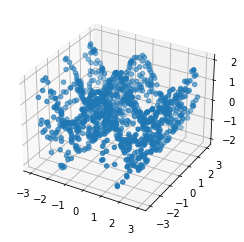

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [5]:
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')
print('Available device: {}'.format(device))

Available device: cpu


In [6]:
model = nn.Sequential(
    nn.Linear(2, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 1),
)

model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=1, bias=True)
)

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [8]:
def train_model(model, inputs, targets, criterion, optimizer, n_epochs):
    train_losses = []
    
    inputs, targets = inputs.to(device), targets.to(device)
    
    for it in range(n_epochs):
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(targets, outputs)
        train_losses.append(loss.item())
        loss.backward()
        
        optimizer.step()
        
        if (it%100 == 0): print('Epoch: {}/{}'.format(it, n_epochs))
        
    return train_losses

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.reshape(-1,1).astype(np.float32))
train_losses = train_model(model=model, inputs=inputs, targets=targets, criterion=criterion, optimizer=optimizer, n_epochs=n_epochs)

Epoch: 0/1000
Epoch: 100/1000
Epoch: 200/1000
Epoch: 300/1000
Epoch: 400/1000
Epoch: 500/1000
Epoch: 600/1000
Epoch: 700/1000
Epoch: 800/1000
Epoch: 900/1000


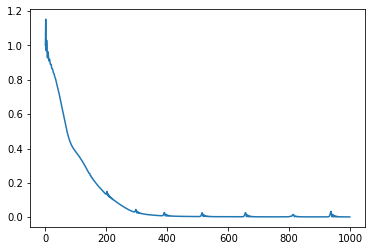

In [9]:
plt.plot(train_losses)

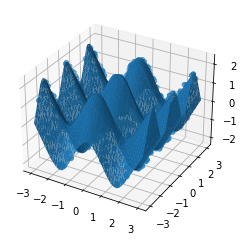

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    X_grid = np.vstack((xx.flatten(), yy.flatten())).T 
    X_grid_torch = torch.from_numpy(X_grid.astype(np.float32))
    Yhat = model(X_grid_torch).numpy().flatten()
    ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], Yhat)
    plt.show()